In [32]:
import numpy as np

In [33]:
#此例中使用单隐藏层层2输入神经网络
#首先初始化nx、ny、ny分别对应输入层、隐藏层、输出层的样本大小
#输入层到隐藏层 W1 * X1 + b1 , 隐藏层到输出层 W2 * X2 + b2 
def initialize(nx,nh,ny):
    np.random.seed(2)#使得每次随机数产生都一样
    W1 = np.random.randn(nh,nx)*0.01
    b1 = np.zeros((nh,1))
    W2 = np.random.randn(ny,nh)*0.01
    b2 = np.zeros((ny,1))
    
    assert(W1.shape == (nh,nx))
    assert(b1.shape == (nh,1))
    assert(W2.shape == (ny,nh))
    assert(b2.shape == (ny,1))
           
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters

In [34]:
parameters = initialize(2,4,1)
print("W1 : ",parameters["W1"])
print("b1 : ",parameters["b1"])
print("W2 : ",parameters["W2"])
print("b2 : ",parameters["b2"])

W1 :  [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 :  [[0.]
 [0.]
 [0.]
 [0.]]
W2 :  [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 :  [[0.]]


In [35]:
#激活函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [36]:
#前向传播
def forward(X,parameters):
    Z1 = np.dot(parameters["W1"],X)+parameters["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["W2"],A1)+parameters["b2"]
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    cache = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    return A2,cache

In [37]:
np.random.seed(1)
X = np.random.randn(2, 3)
A2 ,cache = forward(X, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997544339153996 -0.0004969620107537464 0.00043818744073098386 0.5001095468498741


In [38]:
#计算代价函数
def compute_cost(A2 , Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2)))
    return cost

In [39]:
np.random.seed(1)
Y = (np.random.randn(1, 3) > 0)
cost = compute_cost(A2, Y)
print("cost = " + str(cost))

cost = 0.6930587583288391


In [40]:
#反向传播
def backward(X,Y,parameters,cache):
    m = Y.shape[1]
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2,cache["A1"].T)/m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    #dZ1 = np.multiply(np.dot(parameters["W2"].T, dZ2), (cache["A1"]*(1 - cache["A1"])))       # For signoid, g'(z) = g（z）*（1-g（z））
    dZ1 = np.multiply(np.dot(parameters["W2"].T, dZ2), (1 - np.power(cache["A1"], 2)))       # For tanh, g'(z) = 1 - g(z)^2
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [41]:
grads = backward(X, Y, parameters, cache)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00487281  0.00064363]
 [ 0.00417893  0.00055596]
 [-0.00253899 -0.00033412]
 [-0.01055324 -0.00139104]]
db1 = [[-0.00176445]
 [-0.00151796]
 [ 0.00091929]
 [ 0.00382131]]
dW2 = [[ 0.0019538   0.00883346  0.00877086 -0.00155899]]
db2 = [[0.16677621]]


In [46]:
#更新参数
def update_parameters(parameters,grads,learning_rate = 0.5):
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]

    return parameters

In [47]:
parameters = update_parameters(parameters, grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00660398 -0.00088448]
 [-0.02345143  0.01612473]
 [-0.01666486 -0.00825041]
 [ 0.01030543 -0.01175736]]
b1 = [[ 0.00088223]
 [ 0.00075898]
 [-0.00045964]
 [-0.00191066]]
W2 = [[-0.01155642 -0.0135068   0.00112911  0.02370157]]
b2 = [[-0.08338811]]


In [54]:
#构建Shallow Neural Networks模型
def snn_model(X,Y,nh,num_iterations = 10000):
    nx = X.shape[0]
    ny = Y.shape[0]
    m = Y.shape[1]
    parameters = initialize(nx,nh,ny)
    for i in range(0,num_iterations):
        A2 ,cache = forward(X, parameters)
        grads = backward(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads)
        if i%1000 == 0:
            cost = compute_cost(A2, Y)
            print("迭代：%d次，损失函数为：%f"%(i,cost))
    return parameters

In [55]:
np.random.seed(1)
X = np.random.randn(2, 3)
Y = (np.random.randn(1, 3) > 0)
parameters = snn_model(X, Y, 4, num_iterations = 10000)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

迭代：0次，损失函数为：0.692739
迭代：1000次，损失函数为：0.000536
迭代：2000次，损失函数为：0.000262
迭代：3000次，损失函数为：0.000173
迭代：4000次，损失函数为：0.000129
迭代：5000次，损失函数为：0.000103
迭代：6000次，损失函数为：0.000086
迭代：7000次，损失函数为：0.000073
迭代：8000次，损失函数为：0.000064
迭代：9000次，损失函数为：0.000057
W1 = [[-0.63242739  1.17235603]
 [-0.73454948  1.34438552]
 [ 0.55097518 -1.05470181]
 [ 0.73972066 -1.36460965]]
b1 = [[ 0.26867491]
 [ 0.33000162]
 [-0.22435215]
 [-0.33633452]]
W2 = [[-2.2728107  -3.02239723  1.84478157  3.10994246]]
b2 = [[0.1966765]]


In [57]:
#预测
def predict(X,parameters):
    A2 ,cache = forward(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [63]:
np.random.seed(1)
X = np.random.randn(2, 3)
predictions = predict(X,parameters)
print(predictions)

[[False False  True]]


In [64]:
##接下来使用吴恩达的例子测试

In [59]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

迭代：0次，损失函数为：0.693048
迭代：1000次，损失函数为：0.309802
迭代：2000次，损失函数为：0.292433
迭代：3000次，损失函数为：0.283349
迭代：4000次，损失函数为：0.276781
迭代：5000次，损失函数为：0.263472
迭代：6000次，损失函数为：0.242044
迭代：7000次，损失函数为：0.235525
迭代：8000次，损失函数为：0.231410
迭代：9000次，损失函数为：0.228464
Training accuracy = 90.50 %
迭代：0次，损失函数为：0.693148
迭代：1000次，损失函数为：0.639477
迭代：2000次，损失函数为：0.637167
迭代：3000次，损失函数为：0.635984
迭代：4000次，损失函数为：0.635215
Training accuracy for 1 hidden units: 67.25 % 
迭代：0次，损失函数为：0.693114
迭代：1000次，损失函数为：0.304580
迭代：2000次，损失函数为：0.288954
迭代：3000次，损失函数为：0.281336
迭代：4000次，损失函数为：0.276206
Training accuracy for 3 hidden units: 89.25 % 
迭代：0次，损失函数为：0.693048
迭代：1000次，损失函数为：0.309802
迭代：2000次，损失函数为：0.292433
迭代：3000次，损失函数为：0.283349
迭代：4000次，损失函数为：0.276781
Training accuracy for 4 hidden units: 90.0 % 
迭代：0次，损失函数为：0.693252
迭代：1000次，损失函数为：0.301904
迭代：2000次，损失函数为：0.287109
迭代：3000次，损失函数为：0.279364
迭代：4000次，损失函数为：0.273944
Training accuracy for 5 hidden units: 89.75 % 
迭代：0次，损失函数为：0.693166
迭代：1000次，损失函数为：0.303238
迭代：2000次，损失函数为：0.284176
迭代：3000次，损失

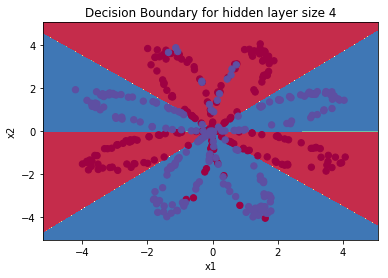

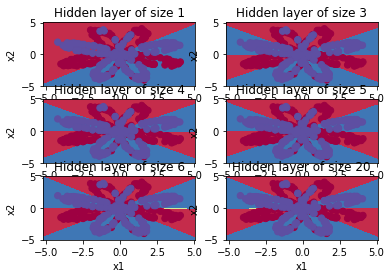

In [62]:
# Generate training data
np.random.seed(1)
m = 400                 # number of samples
N = int(m / 2)          # number of points per class
D = 2                   # dimension
X = np.zeros((m, D))    # data matrix where each row is a single example
Y = np.zeros((m ,1), dtype = 'uint8')   # labels vector (0 for red, 1 for blue)
a = 4                   # maximum radius of the flower
for j in range(2):
    ix = range(N * j, N * (j + 1))
    theta = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2
    radius = a * np.sin(4 * theta) + np.random.randn(N) * 0.2
    X[ix] = np.c_[radius * np.sin(theta), radius * np.cos(theta)]
    Y[ix] = j
X = X.T
Y = Y.T

# Model training
parameters = snn_model(X, Y, nh = 4, num_iterations = 10000)

# Accuracy
predictions = predict(X, parameters)
print('Training accuracy = %.2f ' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

# Binary classification
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01        # Meshgrid interval
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))        # Generate a grid of points with interval h
Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
Z = Z.reshape(xx.shape)
plt.figure(2)
plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X[0, :], X[1, :], c = Y.flatten(), s = 40, cmap = plt.cm.Spectral)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Tuning hidden layer size
hidden_layer_sizes = [1, 3, 4, 5, 6, 20] #分别尝试几种隐藏层
plt.figure(3)
for i, nh in enumerate(hidden_layer_sizes):
    plt.subplot(3, 2, i + 1)
    plt.title('Hidden layer of size %d' % nh)
    parameters = snn_model(X, Y, nh, num_iterations = 5000)
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, cmap=plt.cm.Spectral)
    predictions = predict(X, parameters)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print('Training accuracy for {} hidden units: {} % '.format(nh, accuracy))

plt.show()